## Logistic regression implementations

**Logistic regression** is one the most important learning algorithms for classification tasks. It assumes a linear decision boundary, which, however, can be extended to a non-linear decision boundary by the application of polynomial expansions. The logistic regression model assumes the *logit transformation* applied over the linear function $x\beta$. This transformation relies on the *sigmoid function* $\sigma(z) = \frac{1}{1 + e^{-z}}$, which guarantees that the output of such transformation falls into the $[0, 1]$ interval and sum up to 1 when values referred to all classes are aggregated.

Consequently, given a response variable $Y \in \{1, 2, ..., K\}$, the above-mentioned transformation implies in the following format for the posterior probability of class $k$, $P(Y = k|x)$:
\begin{equation}
    \displaystyle P(Y = k|x) = \frac{\exp(x\beta_k)}{1 + \sum_{l=1}^{K-1} \exp(x\beta_l)} = p_k(x; \theta)
\end{equation}
Where $\theta = (\beta_1, \beta_2, ..., \beta_{K-1})$ and $K$ is the category of reference. The estimation of vector $\theta$ follows from maximizing the log-likelihood of a sample $\{(Y_i, x_i)\}_{i=1}^N$:
\begin{equation}
    L(\theta) = \displaystyle \sum_{i=1}^N l_i(\theta) = \sum_{i=1}^N\Big(\sum_{k=1}^KI(G = k)\log(p_k(x_i; \theta))\Big)
\end{equation}

This estimation method is then called *maximum likelihood*. Alternatively, one can define the problem of fitting a logistic regression model by minimizing a cost function as the *binary cross-entropy*, which applies for a binary classification problem. This cost function is given by:
\begin{equation}
  \displaystyle BCE = \frac{-1}{N}\sum_{i=1}^Ny_i\log(\hat{y}_i) + (1 - y_i)\log(1 - \hat{y}_i)
\end{equation}

Where $y_i$ is the true label for training instance $i$ and $\hat{y_i}$ is the output of $\sigma(x_i\hat{\beta})$.

Note that a **regularized logistic regression** can be constructed from the inclusion of a penalty term (L1 or L2) into the objetive function (either the log-likelihood to be maximized or the cross-entropy to be minimized). By doing so, coefficients $\beta$ are shrunken towards zero, which is important for improving model performance when the features space is sparse. In practice, this means simply changing the gradient of objective functions used during fitting procedures.

Logistic regression is not only proper to prediction, but is also widely used for **inference**, specially because of its high interpretability and explainability. For this later purpose, statistical tests are available to assess the significance of each input for explaining the outcome. The Wald test, for example, allows either the test of individual or joint significance. Another point that justifies the use of logistic regression for inference problems is the fact that this model can be derived from a highly intuitive latent variable model.

The Python implementation found in this [article](https://towardsdatascience.com/master-machine-learning-logistic-regression-from-scratch-with-python-acfe73a0a424) is very straightforward. It creates a class named *LogisticRegression* for binary classification tasks, whose initialization requires the learning rate and the number of iterations of the optimization algorithm used for the fitting procedure. Besides, it has the following methods: two static methods for calculating the sigmoid function (*_sigmoid*) and the binary cross-entropy cost function (*_binary_cross_entropy*); the most important method, though, is the *fit* method, which iteratively updates the coefficients values through *gradient descent algorithm*. Finally, the methods *predict_proba* and *predict* simply returns the output $\sigma(x\hat{\beta})$ and the predicted class for a given observation $x$. The *predict* method makes use of *predict_proba* in conjunction with a threshold, a value above which the predicted probability leads to the assignment of class $Y = 1$ for instance $x$.

**References**
<br>
[Master Machine Learning: Logistic Regression From Scratch With Python](https://towardsdatascience.com/master-machine-learning-logistic-regression-from-scratch-with-python-acfe73a0a424).
<br>
[The Elements of Statistical Learning](https://web.stanford.edu/~hastie/Papers/ESLII.pdf).

----------------

This notebook first imports all relevant libraries, and then presents an implementation of logistic regression algorithm that follows from this [article](https://towardsdatascience.com/master-machine-learning-logistic-regression-from-scratch-with-python-acfe73a0a424) ([Github](https://github.com/daradecic/BDS-articles/blob/main/011_MML_Logistic_Regression.ipynbh) page of reference).

**Summary:**
1. [Libraries](#libraries)<a href='#libraries'></a>.
2. [Preparing the data](#data_prep)<a href='#data_prep'></a>.
3. [Logistic regression class](#logistic_regression)<a href='#logistic_regression'></a>.
4. [Model training](#model_training)<a href='#model_training'></a>.

<a id='libraries'></a>

## Libraries

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
cd "/content/gdrive/MyDrive/Studies/logistic_regression"

/content/gdrive/MyDrive/Studies/logistic_regression


In [3]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt

<a id='data_prep'></a>

## Preparing the data

<a id='data_import'></a>

### Reading the data

In [4]:
data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<a id='logistic_regression'></a>

## Logistic regression class

In [5]:
class LogisticRegression:
    '''
    A class which implements logistic regression model with gradient descent.
    '''
    def __init__(self, learning_rate=0.1, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights, self.bias = None, None
        
    @staticmethod
    def _sigmoid(x):
        '''
        Private method, used to pass results of the line equation through the sigmoid function.
        
        :param x: float, prediction made by the line equation
        :return: float
        '''
        return 1 / (1 + np.exp(-x))
    
    @staticmethod
    def _binary_cross_entropy(y, y_hat):
        '''
        Private method, used to calculate binary cross entropy value between actual classes 
        and predicted probabilities.
        
        :param y: array, true class labels
        :param y_hat: array, predicted probabilities
        :return: float
        '''
        def safe_log(x): 
            return 0 if x == 0 else np.log(x)
        total = 0
        for curr_y, curr_y_hat in zip(y, y_hat):
            total += (curr_y * safe_log(curr_y_hat) + (1 - curr_y) * safe_log(1 - curr_y_hat))
        return - total / len(y)
        
    def fit(self, X, y):
        '''
        Used to calculate the coefficient of the logistic regression model.
        
        :param X: array, features
        :param y: array, true values
        :return: None
        '''
        # 1. Initialize coefficients
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        # 2. Perform gradient descent
        for i in range(self.n_iterations):
            linear_pred = np.dot(X, self.weights) + self.bias
            probability = self._sigmoid(linear_pred)
            
            # Calculate derivatives
            partial_w = (1 / X.shape[0]) * (2 * np.dot(X.T, (probability - y)))
            partial_d = (1 / X.shape[0]) * (2 * np.sum(probability - y))
            
            # Update the coefficients
            self.weights -= self.learning_rate * partial_w
            self.bias -= self.learning_rate * partial_d
            
    def predict_proba(self, X):
        '''
        Calculates prediction probabilities for a given threshold using the line equation 
        passed through the sigmoid function.
        
        :param X: array, features
        :return: array, prediction probabilities
        '''
        linear_pred = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_pred)
    
    def predict(self, X, threshold=0.5):
        '''
        Makes predictions using the line equation passed through the sigmoid function.
        
        :param X: array, features
        :param threshold: float, classification threshold
        :return: array, predictions
        '''
        probabilities = self.predict_proba(X)
        return [1 if i > threshold else 0 for i in probabilities]

<a id='model_training'></a>

## Model training

<a id='fitting_model'></a>

### Fitting the model

In [6]:
model = LogisticRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in exp


<a id='model_eval'></a>

### Model evaluation

In [7]:
print(accuracy_score(y_test, preds))
print(confusion_matrix(y_test, preds))

0.9473684210526315
[[43  0]
 [ 6 65]]


<a id='threshold_opt'></a>

### Threshold optimization

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in exp
/usr/local/lib/pyth

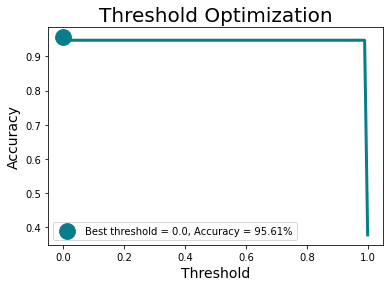

In [10]:
evals = []
for thresh in np.arange(0, 1.01, 0.01):
    preds = model.predict(X_test, threshold=thresh)
    acc = accuracy_score(y_test, preds)
    evals.append({'Threshold': thresh, 'Accuracy': acc})
    
evals_df = pd.DataFrame(evals)
best_thresh = evals_df.sort_values(by='Accuracy', ascending=False).iloc[0]

plt.plot(evals_df['Threshold'], evals_df['Accuracy'], lw=3, c='#087E8B')
plt.scatter(best_thresh['Threshold'], best_thresh['Accuracy'], label=f"Best threshold = {best_thresh['Threshold']}, Accuracy = {(best_thresh['Accuracy'] * 100):.2f}%", s=250, c='#087E8B')
plt.title('Threshold Optimization', size=20)
plt.xlabel('Threshold', size=14)
plt.ylabel('Accuracy', size=14)
plt.legend()
plt.show()

In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test, threshold=0)

print(accuracy_score(y_test, preds))
print(confusion_matrix(y_test, preds))

0.956140350877193
[[42  1]
 [ 4 67]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in exp


<a id='sklearn'></a>

### Comparison with scikit-learn

In [12]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

print(accuracy_score(y_test, lr_preds))
print(confusion_matrix(y_test, lr_preds))

0.9649122807017544
[[40  3]
 [ 1 70]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
